# K-Nearest Neighbor from Scratch

In [1]:
import numpy as np
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

## Distance between two vectors

### Euclidean Distance

In [2]:
def euclidean_distance(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    distance = 0
    for i in range(len(v1)):
        distance += (v1[i] - v2[i]) ** 2
    return np.sqrt(distance)

Testing the Euclidean Distance Function:

In [3]:
vector1 = [1, 2, 3]
vector2 = [1, 2, 3]
vector3 = [4, 5, 6]

#Testing it against the SciPy euclidean-Method
if (distance.euclidean(vector1, vector2) == euclidean_distance(vector1, vector2) and
    distance.euclidean(vector1, vector3) == euclidean_distance(vector1, vector3) and
    distance.euclidean(vector2, vector3) == euclidean_distance(vector2, vector3)):
    print("The code works")
    

The code works


## Predict-Method

### Parameters

The following parameters are required in the KNN-Algorithm:
- k for the amount of neighbors
- train_set: Entire matrix with target variables
- test_vector: single vector without target value.

### Steps
  
The following steps are required to implement the KNN:
- Calculate the distance between the test_vector and every other point in the train_set
- Sort the distances by distance value
- Keep the distance of the k smallest ones
- Get values of the target variable for k train_set rows with the smallest distance
- Check which target variable wins

### Implementation

In [26]:
def predict(train_set, test_vector, k):
    distances = []
    for i in range(len(train_set)):
        distance = euclidean_distance(train_set[i][:-1], test_vector)
        distances.append([train_set[i], distance])
    #Sorting the list by distance:
    distances.sort(key = lambda x: x[1])
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][0])
    classes = {}
    for i in range(len(neighbors)):
        target = neighbors[i][-1]
        if target in classes:
            classes[target] += 1
        else:
            classes[target] = 1
    return_value = sorted(classes.items(), key = lambda x: x[1], reverse=True)
    return return_value[0][0]

In [5]:
train_set = [[1, 2, 3, 0], [4, 5, 6, 1], [4, 3, 7, 1], [2, 3, 3, 0]]
test_vector = [1, 2, 3]

predict(train_set, test_vector, 3)

0

### Evaluation
  
We need to evaluate our results

In [6]:
def eval(y_target, y_pred):
    n_correct = 0
    for i in range(len(y_target)):
        if y_target[i] == y_pred[i]:
            n_correct += 1
    return n_correct / len(y_target)

In [7]:
target = [0, 0, 1]
prediction = [1, 1, 1]

eval(target, prediction)

0.3333333333333333

# Testing with real data

## The iris dataset

In [45]:
import pandas as pd
from sklearn.datasets import load_iris

iris_dataset = load_iris()
Y_iris = iris_dataset.target
iris_dataset = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_dataset = pd.concat([iris_dataset, pd.Series(Y_iris)], axis=1)
iris_dataset.rename(columns={0: "class"}, inplace=True)
iris_dataset.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


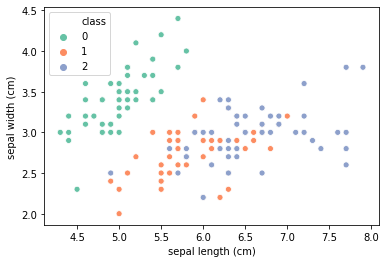

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="class", data=iris_dataset, palette="Set2")

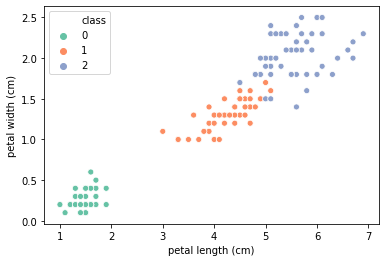

In [55]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="class", data=iris_dataset, palette="Set2")

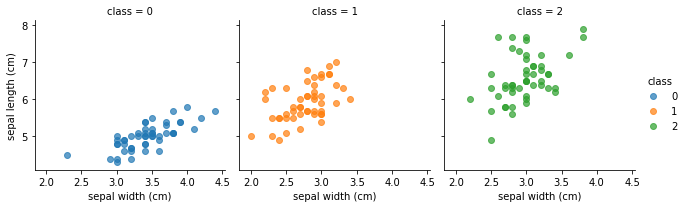

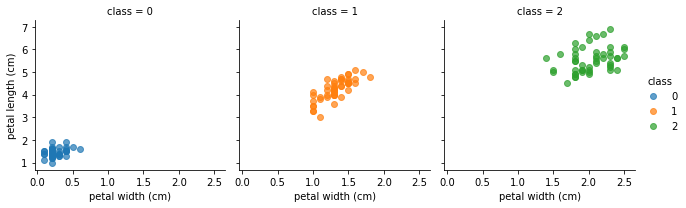

In [60]:
g1 = sns.FacetGrid(iris_dataset, col="class", hue="class")
g1.map(plt.scatter, "sepal width (cm)", "sepal length (cm)", alpha=.7)
g1.add_legend();

g2 = sns.FacetGrid(iris_dataset, col="class", hue="class")
g2.map(plt.scatter, "petal width (cm)", "petal length (cm)", alpha=.7)
g2.add_legend();


## Train-Test Split
  
To further test the builded model, we need a function to split a given dataset in testing and training data.

In [42]:
def test_train_split(dataset, test_set_size=0.25):
    n_test_set = int(test_set_size * len(dataset))
    test_set = dataset.sample(n_test_set)
    train_set = []
    for index in dataset.index:
        if index in test_set.index:
            continue
        train_set.append(dataset.iloc[index])
    
    train_set = pd.DataFrame(train_set).astype(float).values.tolist()
    test_set = test_set.astype(float).values.tolist()
    
    return train_set, test_set

train_set, test_set = test_train_split(iris_dataset, .25)

#print(train_set)
#print(test_set)

## The actual test

In [43]:
# Getting the test_dataset
test_set_results = []
for row in test_set:
    without_target = row[:-1]
    prediction = predict(train_set, without_target, 3)
    test_set_results.append(prediction)

actual_target = np.array(test_set)[:, -1]
eval(actual_target, test_set_results)

0.918918918918919

## Finding best k

In [44]:
different_ks = []

for k in range(1, 20, 2):
    test_set_results = []
    for row in test_set:
        without_target = row[:-1]
        prediction = predict(train_set, without_target, k)
        test_set_results.append(prediction)
    actual_target = np.array(test_set)[:, -1]
    different_ks.append((k, eval(actual_target, test_set_results)))



print(different_ks)

[(1, 0.918918918918919), (3, 0.918918918918919), (5, 0.9459459459459459), (7, 0.972972972972973), (9, 0.972972972972973), (11, 0.972972972972973), (13, 0.9459459459459459), (15, 0.9459459459459459), (17, 0.9459459459459459), (19, 0.9459459459459459)]
